# Importing Database and Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data_url =  "https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/refs/heads/master/palmerpenguins/data/penguins.csv"
penguins = pd.read_csv(data_url)
penguins = penguins.dropna()

# Part 1

You're working with a researcher at the McMurdo research statement. They're sending researchers out to the field who are not experts in penguins. They want to make an AR app to help these non-penguin experts determine the species of a given penguin based on a handful of biomarkers. Answer the following questions:

1. Is it feasible to determine species of the penguin based on one remote measurement of its bill length, bill height, or flipper length? Back your claim up with scatter plots. If it is not feasible, explain what would be the minimum number of metrics needed to determine penguin species. Assume all penguins are gentoo, adelie, or chin strap.

2. The researchers are also interested in training a model to be used as an educational tool. The idea is that the model would be trained on the penguin data, and the researchers could then use the resulting model to explain what the key features of given penguin species are. Would you recommend SVM or decision trees for such a model?

2. A researcher asked you a question: when training a model, why not use all metrics at our disposal, not just the minimum number of metrics. Isn't bigger always better? Why do we typically want to minimize the number of metrics trained on a model?

## 1.1 
Based on Figure 1, there are no feasable single attributes that could be used to determine a Penguin's species from the dataset, as the range of possible values for the attributes overlap between species.

Based on Figure 2, there are a few pairs of attributes that could potentially be used to determine species; flipper length and bill length, bill depth and bill length, and body mass and bill length. Bill length and bill depth create relatively clear separations, but crucially, most of the overlap is between gentoo and the other two species, and body mass combined with bill_depth creates a very clear distinction between gentoo and the other two species. Thus, using these three metrics, the model should be able to classify relatively well.

### Code for Figure 1

In [ ]:
import matplotlib.pyplot as plt

# Generates scatter plots for the given attributes
def examine_penguins(penguins, attributes):
    num_attributes = len(attributes)
    cols = 2  # Number of columns in the grid
    rows = (num_attributes + cols - 1) // cols  # Calculate required rows

    fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, attribute in enumerate(attributes):
        axes[i].scatter(penguins[attribute], penguins['species'])
        axes[i].set_title(attribute)
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Species')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Attributes
attributes = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

### Figure 1

In [ ]:
examine_penguins(penguins, attributes)

### Code for Figure 2

In [ ]:
def examine_penguins(penguins, attribs, target): 

  # Plot the pair grid
  g = sns.PairGrid(penguins[attribs], hue=target)
  g.map_diag(sns.histplot)
  g.map_offdiag(sns.scatterplot)
  g.add_legend()
  return g

penguins = penguins.dropna()

### Figure 2

In [ ]:
attributes = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "species"]
examine_penguins(penguins, attributes, 'species')

## 1.2
I would recommend decisions trees for this model, especially if its being used in an educational context. The amount of metrics to process is sufficiently small as to not warrant the complexity of SVMs, and SVMs would make the classification a lot harder to explain. A decision tree will clearly show what attributes are being analyzed and what values for each metric indicate whether a penguin belongs to a particular species.

## 1.3 
Minimizing the metrics used is crucial because it requires less computational power and less complex algorithms for classification. It makes the model easier to understand and less of a "black box." Even with a more complex model, if needless metrics are used it could even still end up being just simply worse at generalizability, depending on the specifics of the data in question and the magnitude of difference between the minimum needed metrics and the total possible metrics.

# Part Two 
Using your reflection form part 1, create a model that predicts all three penguin species. You must:

1. Choose what metrics to use using the justification from part 1.

2. Train a SVM classifier on the chosen metrics. You must use cross validation to tune the C hyper parameter, and then run the model on the testing set using the chosen best value for C.

3. Train a decision tree classifier on the chosen metrics. You must use cross validation to tune the max_depth hyper parameter, and then run the model on the testing set using the chosen best value for max_depth
After you train your SVM classifier and decision tree classifier, make an argument for what model is best for classifying

## 2.1
As mentioned in part one, the best combination of metrics for classification seem to be bill length and bill depth, along with body mass.

## 2.2
According to Figure 3, there is no obvious best value for the C hyper parameter. It seems to be pretty consistently achieving a median test score of around .985 with any C value between 1 and 9, thus we will simply choose C=1.


### Setup Model

In [2]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate

X = penguins.loc[:,["bill_length_mm", "body_mass_g", "bill_depth_mm"]]
y = penguins.loc[:,"species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


### Hyperparameter Tuning (C)

In [3]:
c_values = range(1, 10)

# Use this to store our results
scores = np.ones((len(c_values), 5))

for (i,c_candidate) in enumerate(c_values):
    print("Cross validating for %d..." % c_candidate)

    # Initializing our model with the given C value 
    model = LinearSVC(C=c_candidate, random_state=42)
    current_scores = cross_val_score(model, X, y, cv=5)
    scores[i] = current_scores

scores

Cross validating for 1...
Cross validating for 2...
Cross validating for 3...
Cross validating for 4...
Cross validating for 5...
Cross validating for 6...
Cross validating for 7...
Cross validating for 8...
Cross validating for 9...


array([[0.98507463, 0.98507463, 0.98507463, 0.96969697, 1.        ],
       [0.98507463, 0.98507463, 0.98507463, 0.96969697, 1.        ],
       [0.98507463, 0.98507463, 0.98507463, 0.96969697, 1.        ],
       [0.98507463, 0.98507463, 0.98507463, 0.96969697, 1.        ],
       [0.98507463, 0.98507463, 0.98507463, 0.96969697, 0.98484848],
       [0.97014925, 0.98507463, 0.98507463, 0.96969697, 0.98484848],
       [0.97014925, 0.98507463, 0.98507463, 0.96969697, 0.98484848],
       [0.97014925, 0.98507463, 0.98507463, 0.96969697, 1.        ],
       [0.98507463, 0.98507463, 0.98507463, 0.96969697, 1.        ]])

### Figure 3

{'whiskers': [<matplotlib.lines.Line2D at 0x168313890>,
 'caps': [<matplotlib.lines.Line2D at 0x168313b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x168310410>,
 'medians': [<matplotlib.lines.Line2D at 0x168313d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x168313ed0>,
 'means': []}

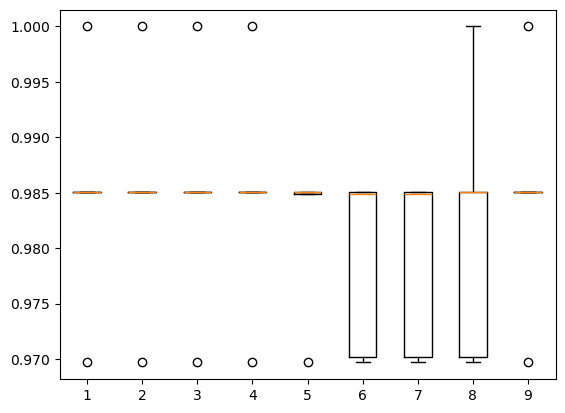

In [4]:
plt.boxplot(scores.T)

### Testing Model With Optimal C Value

In [5]:
# Setting up our model 
model = LinearSVC(C=1, random_state=42)

# Compute both training and test scores
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True)

# Access training and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']
np.median(train_scores)
np.median(test_scores)

# Display scores
print("Train Score (median): ", np.median(train_scores))
print("Test Score (median): ", np.median(test_scores))

Train Score (median):  0.9850187265917603
Test Score (median):  0.9850746268656716


### IGNORE: was looking into PCA, couldn't get it working :(

In [ ]:
from sklearn.decomposition import PCA

# Step 1: Initialize PCA to reduce to 2 components
pca = PCA(n_components=2)

# Step 2: Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train)

# Step 3: Transform the test data as well (if needed)
X_test_pca = pca.transform(X_test)

def plotSVMResults(X,y, model):

    # Step 1: Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

    # Step 2: Predict the class labels for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    features = set(y)

    Z_num = Z.copy()
    y_num = y.copy()

    ## Change nominal values to 0 or 1
    for (i,label) in enumerate(features):
        Z_num[Z_num[:,:]==label] = i 
        y_num[y_num[:]==label] = i 

    Z_num = Z_num.astype(int)
    y_num = y_num.astype(int)

    fig, ax = plt.subplots()

    #  Plot the decision boundary and the data points
    ax.contourf(xx, yy, Z_num, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y_num, edgecolors='k', marker='o')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('SVM Decision Boundary with LinearSVC')

    return (ax,fig)

In [ ]:
plotSVMResults(X_train_pca, y_train, model)

## 2.3
Based on Figure 4 value for C>=6 seems to achieve consistent results (median score above 0.95). Thus we will chose C=6. 

Testing the model with this value gave a median training score of 1, and a median testing score of 0.969. Not only is this testing score lower than the testing score for SVM, but it is also lower than its own training score, indicating overfitting. Thus, SVM appears to be the best choice for classifying with the chosen metrics.

### Hyperparameter Tuning

In [6]:
# Make our X variable, which will include all of the predictor 
#    attributes (bill_legnth and body_mass)
# and y will include the target attributes (species)

X = penguins.loc[:, ["bill_length_mm", "bill_depth_mm", "body_mass_g"]]
y = penguins.loc[:,"species"]

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

max_depth_values = range(1, 20)


# Use this to store our results
scores = np.ones((len(max_depth_values), 5))

for (i,max_depth_candidate) in enumerate(max_depth_values):
  print("Cross validating for %d..." % max_depth_candidate)

  # Initializing our model with the given C value 
  model = DecisionTreeClassifier(max_depth=max_depth_candidate, random_state=42)
  current_scores = cross_val_score(model, X, y, cv=5)
  scores[i] = current_scores

scores

Cross validating for 1...
Cross validating for 2...
Cross validating for 3...
Cross validating for 4...
Cross validating for 5...
Cross validating for 6...
Cross validating for 7...
Cross validating for 8...
Cross validating for 9...
Cross validating for 10...
Cross validating for 11...
Cross validating for 12...
Cross validating for 13...
Cross validating for 14...
Cross validating for 15...
Cross validating for 16...
Cross validating for 17...
Cross validating for 18...
Cross validating for 19...


array([[0.73134328, 0.71641791, 0.74626866, 0.74242424, 0.75757576],
       [0.97014925, 0.94029851, 0.88059701, 0.87878788, 0.93939394],
       [0.97014925, 0.95522388, 0.88059701, 0.92424242, 0.96969697],
       [0.98507463, 1.        , 0.95522388, 0.95454545, 0.95454545],
       [0.98507463, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.95522388, 0.96969697, 0.96969697],
       [0.97014925, 1.        , 0.

### Figure 4

{'whiskers': [<matplotlib.lines.Line2D at 0x1684f7110>,
 'caps': [<matplotlib.lines.Line2D at 0x1684f6c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1684f7250>,
 'medians': [<matplotlib.lines.Line2D at 0x1684f6d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1689f02d0>,
 'means': []}

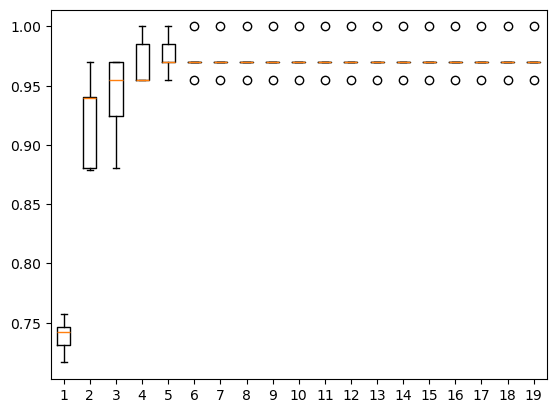

In [8]:
plt.boxplot(scores.T)

### Testing Model with Optimal Max Depth Value

In [12]:
# Initializing our model with the optimal C value (6)
model = DecisionTreeClassifier(max_depth=6, random_state=42)
cv_results = cross_validate(model, X, y, cv=5)

# Compute both training and test scores
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True)

# Access training and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']
np.median(train_scores)
np.median(test_scores)

# Display scores
print("Train Score (median): ", np.median(train_scores))
print("Test Score (median): ", np.median(test_scores))

Train Score (median):  1.0
Test Score (median):  0.9696969696969697
